In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
reviews_df = pd.read_csv('data/amazon_alexa.tsv', sep = '\t')

In [81]:
reviews_df.shape

(3150, 5)

In [82]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [83]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [84]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


# Exploração

* Verificando valores nulos

<AxesSubplot:>

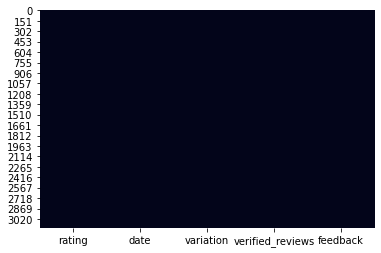

In [85]:
sns.heatmap(reviews_df.isnull(), cbar = False)

In [86]:
reviews_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

* Gerando Histogramas

array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'feedback'}>]], dtype=object)

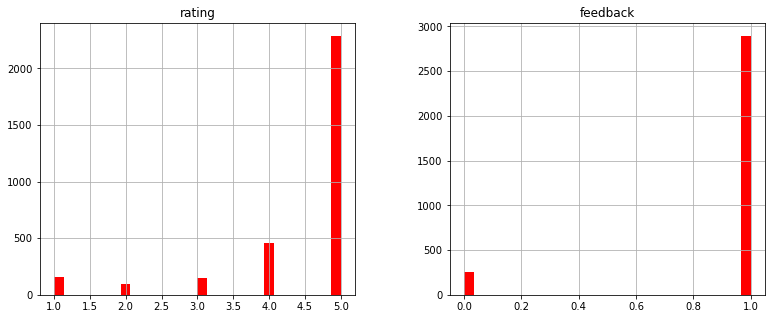

In [87]:
reviews_df.hist(bins = 30, figsize = (13, 5), color = 'r')

* Verificando o tamanho dos textos

In [88]:
reviews_df['lenght'] = reviews_df.verified_reviews.apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,lenght
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<AxesSubplot:ylabel='Frequency'>

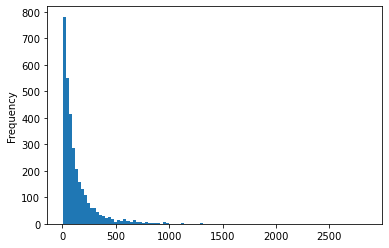

In [89]:
reviews_df.lenght.plot(bins = 100, kind = 'hist')

In [90]:
reviews_df.lenght.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: lenght, dtype: float64

In [91]:
reviews_df[reviews_df.lenght == reviews_df.lenght.max()].verified_reviews.iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [92]:
reviews_df[reviews_df.lenght == reviews_df.lenght.min()].verified_reviews.iloc[0]

'😍'

* Separando feedbacks positivos e negativos

In [93]:
positive = reviews_df[reviews_df.feedback == 1]

In [94]:
positive.describe()

,rating,feedback,lenght
count,2893.000000,2893.0,2893.000000
mean,4.737643,1.0,124.659177
std,0.546544,0.0,174.624491
min,3.000000,1.0,1.000000
25%,5.000000,1.0,29.000000
50%,5.000000,1.0,69.000000
75%,5.000000,1.0,154.000000
max,5.000000,1.0,2851.000000


In [95]:
negative = reviews_df[reviews_df.feedback == 0]

In [96]:
negative.describe()

,rating,feedback,lenght
count,257.000000,257.0,257.000000
mean,1.373541,0.0,215.241245
std,0.484688,0.0,236.325955
min,1.000000,0.0,1.000000
25%,1.000000,0.0,53.000000
50%,1.000000,0.0,137.000000
75%,2.000000,0.0,289.000000
max,2.000000,0.0,1686.000000


Feedbacks negativos tendem a ter em média 100 caracteres a mais que os positivos

<AxesSubplot:xlabel='feedback', ylabel='count'>

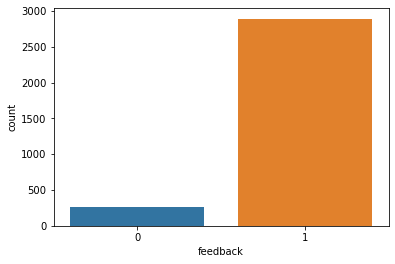

In [97]:
sns.countplot(x = reviews_df.feedback)

<AxesSubplot:xlabel='rating', ylabel='count'>

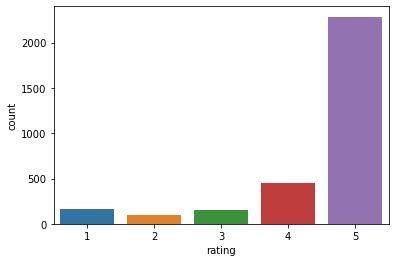

In [98]:
sns.countplot(x = reviews_df.rating)

<AxesSubplot:xlabel='variation', ylabel='rating'>

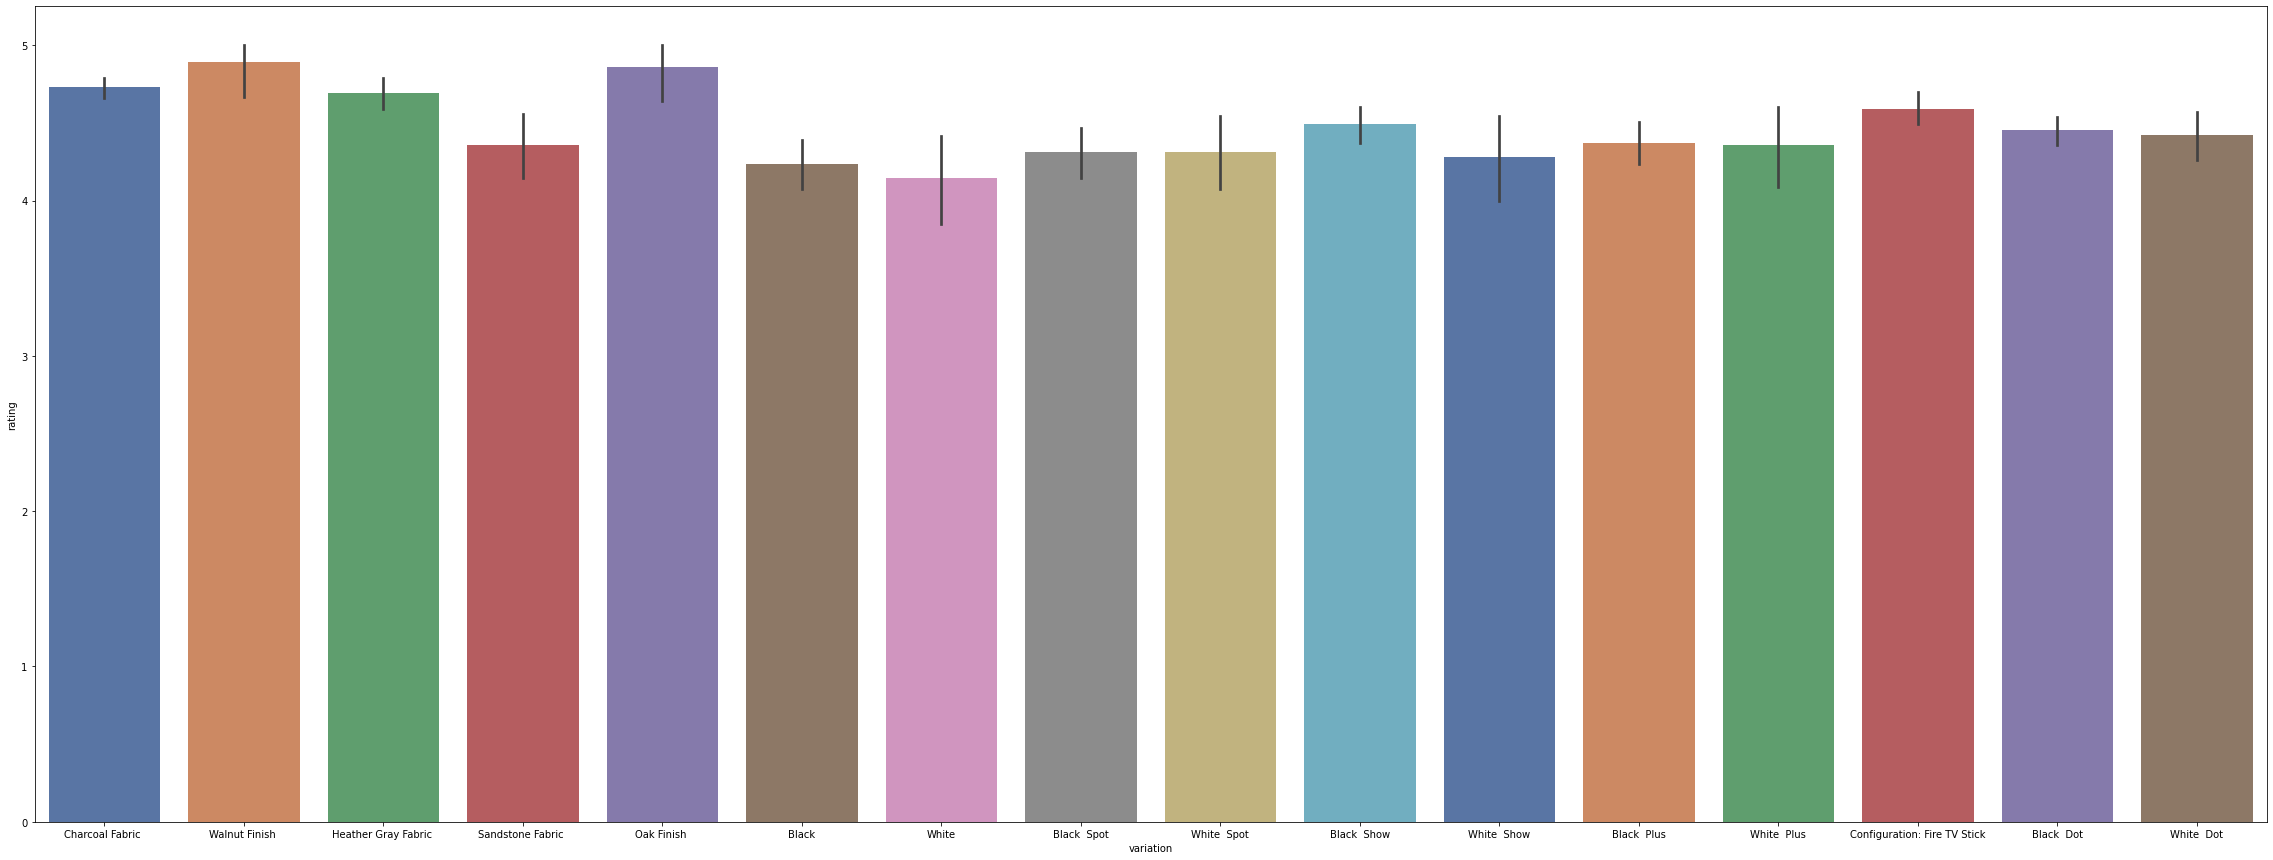

In [99]:
plt.figure(figsize = (40, 15))
sns.barplot(x = reviews_df.variation, y = reviews_df.rating, palette = 'deep')

* Nuvem de palavras

In [100]:
sentences = reviews_df.verified_reviews.tolist()
len(sentences)

3150

In [101]:
print(sentences[0: 10])

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music', 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.', 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.', "I think this is the 5th one I've purcha

In [102]:
sentences_as_one_string = ' '.join(sentences)

In [103]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [104]:
len(sentences_as_one_string)

419105

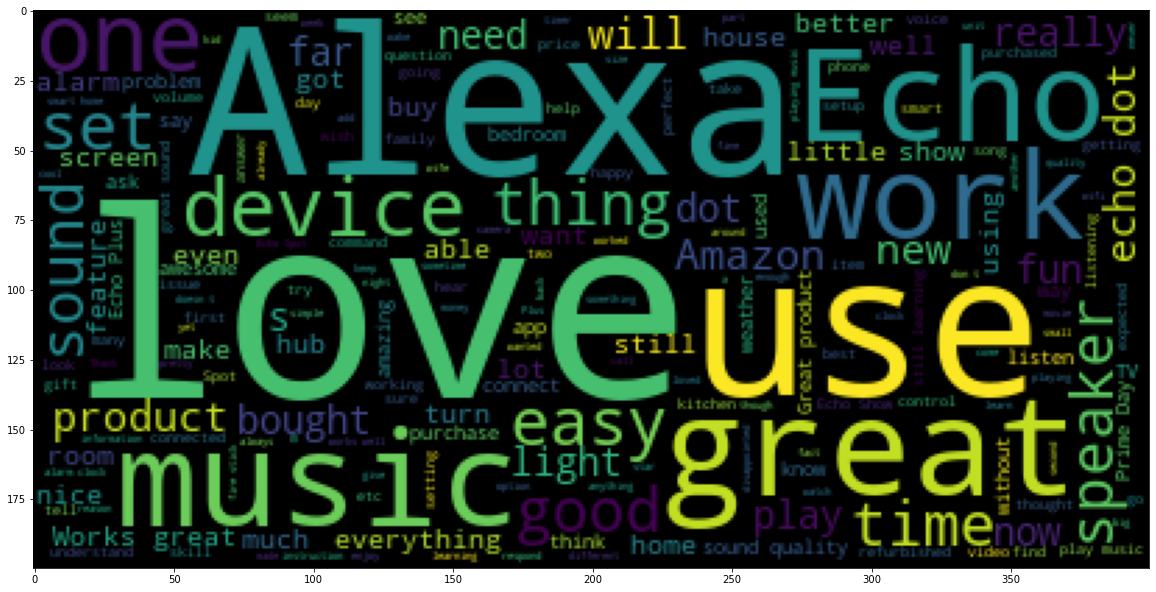

In [105]:
from wordcloud import WordCloud
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [106]:
negative_list = negative.verified_reviews.tolist()
negative_sentences_as_one_string = ' '.join(negative_list)
len(negative_sentences_as_one_string)

55573

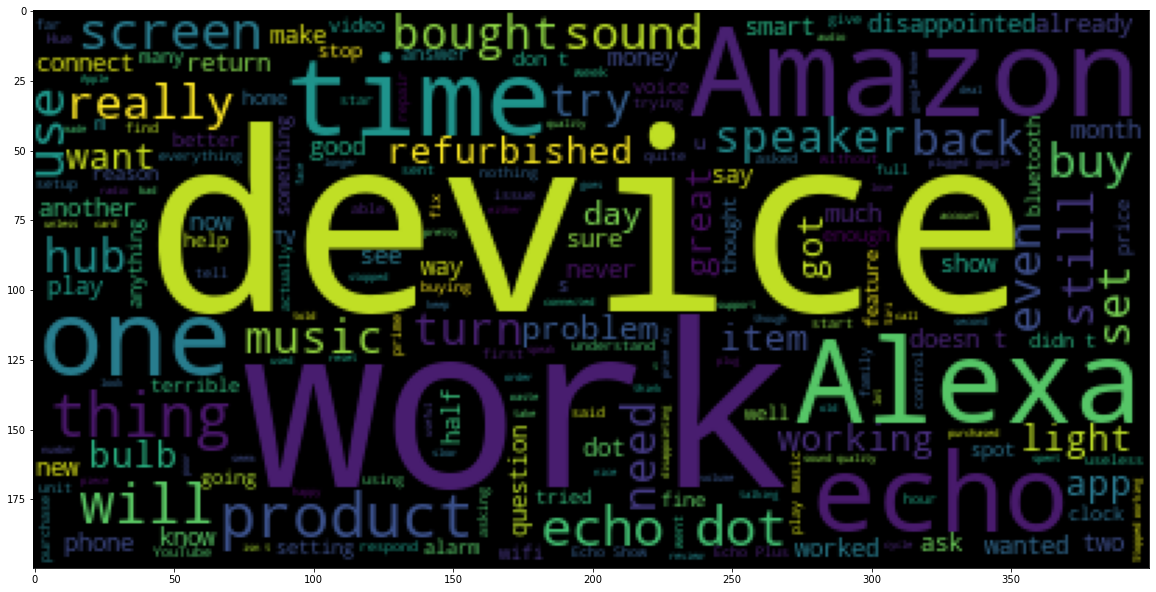

In [107]:
plt.figure(figsize = (20, 20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# Limpeza de dados

In [108]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,lenght
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [109]:
reviews_df.drop(['date', 'lenght', 'rating'], axis = 1, inplace = True)

In [110]:
reviews_df.variation.unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [111]:
X_cat = reviews_df[['variation']]
X_cat

,variation
0,Charcoal Fabric
1,Charcoal Fabric
2,Walnut Finish
3,Charcoal Fabric
4,Charcoal Fabric
...,...
3145,Black Dot
3146,Black Dot
3147,Black Dot
3148,White Dot


In [112]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [113]:
X_cat[1], X_cat.shape, type(X_cat)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 (3150, 16),
 numpy.ndarray)

In [114]:
X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

In [115]:
reviews_df.drop('variation', axis = 1, inplace = True)

In [116]:
reviews_df.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [117]:
reviews_df = pd.concat([reviews_df, X_cat], axis = 1)
reviews_df

,verified_reviews,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Love my Echo!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Loved it!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Sometimes while playing a game, you can answer...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,I have had a lot of fun with this thing. My 4 ...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Music,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,"Listening to music, searching locations, check...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,"I do love these things, i have them running my...",1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,Only complaint I have is that the sound qualit...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


* Remoção dde pontuação

In [118]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [119]:
test = 'Listening to music, searching locations, check'

In [120]:
test_punc_removed = [char for char in test if char not in string.punctuation]
print(test_punc_removed)

['L', 'i', 's', 't', 'e', 'n', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'm', 'u', 's', 'i', 'c', ' ', 's', 'e', 'a', 'r', 'c', 'h', 'i', 'n', 'g', ' ', 'l', 'o', 'c', 'a', 't', 'i', 'o', 'n', 's', ' ', 'c', 'h', 'e', 'c', 'k']


In [121]:
test_punc_removed = ''.join(test_punc_removed)
test_punc_removed

'Listening to music searching locations check'

* Remoção de Stop Words

In [122]:
import nltk

In [123]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\breve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [124]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [125]:
len(stopwords.words('english'))

179

In [126]:
print(stopwords.words('portuguese'))

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [127]:
len(stopwords.words('portuguese'))

204

In [128]:
test_punc_removed

'Listening to music searching locations check'

In [129]:
test_punc_removed = [word for word in test_punc_removed.split() if word.lower not in stopwords.words('english')]
print(test_punc_removed)

['Listening', 'to', 'music', 'searching', 'locations', 'check']


In [130]:
test_punc_removed = ' '.join(test_punc_removed)
test_punc_removed

'Listening to music searching locations check'

## Tokenização

In [131]:
from sklearn.feature_extraction.text import CountVectorizer

In [132]:
sample_data = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

In [133]:
vectorizer = CountVectorizer()

In [134]:
X = vectorizer.fit_transform(sample_data)

In [135]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [136]:
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [137]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


## Pipeline de limpeza dos textos

In [157]:
def message_cleaning(message):
    text = [char for char in message if char not in string.punctuation]
    text = ''.join(text)
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return text

In [161]:
reviews_df_clean = reviews_df.verified_reviews.apply(message_cleaning)

In [162]:
print(reviews_df_clean[3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']


In [164]:
print(reviews_df.verified_reviews[3])

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


In [165]:
reviews_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [166]:
vectorizer = CountVectorizer(analyzer = message_cleaning)

In [167]:
reviews_countvectorizer = vectorizer.fit_transform(reviews_df.verified_reviews)

In [168]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [169]:
len(vectorizer.get_feature_names())

5211

In [170]:
reviews_countvectorizer.shape

(3150, 5211)

In [172]:
reviews_df.drop(['verified_reviews'], axis = 1, inplace = True)

In [174]:
type(reviews_countvectorizer)

scipy.sparse.csr.csr_matrix

In [175]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
type(reviews)

pandas.core.frame.DataFrame

In [176]:
reviews_df = pd.concat([reviews_df, reviews], axis = 1)

In [178]:
reviews_df

,feedback,0,1,2,3,4,5,6,7,8,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
X = reviews_df.drop(['feedback'], axis = 1)
y = reviews_df.feedback

## Treinamento e avaliação do Naïve Bayes

In [182]:
from sklearn.model_selection import train_test_split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [196]:
X_train.shape, X_test.shape

((2520, 5227), (630, 5227))

In [185]:
from sklearn.naive_bayes import MultinomialNB

In [187]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [188]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [197]:
y_pred = naive_bayes.predict(X_test)

In [198]:
accuracy_score(y_test, y_pred)

0.9619047619047619

In [199]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 38,  20],
       [  4, 568]], dtype=int64)

<AxesSubplot:>

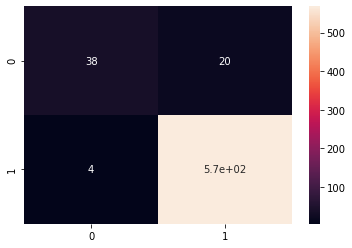

In [200]:
sns.heatmap(cm, annot = True)

In [201]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76        58
           1       0.97      0.99      0.98       572

    accuracy                           0.96       630
   macro avg       0.94      0.82      0.87       630
weighted avg       0.96      0.96      0.96       630



## Treinamento e avaliação do Regressão Logística

In [202]:
from sklearn.linear_model import LogisticRegression

In [203]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [204]:
y_pred = logistic.predict(X_test)

In [206]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [207]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.36      0.50        58
           1       0.94      0.99      0.96       572

    accuracy                           0.93       630
   macro avg       0.87      0.68      0.73       630
weighted avg       0.93      0.93      0.92       630



## Simulação 

In [208]:
import pickle

In [209]:
with open('text_classifier.pkl', 'wb') as f:
    pickle.dump([naive_bayes, onehotencoder, vectorizer], f)

In [210]:
with open('text_classifier.pkl', 'rb') as f:
    bayes, onehot, vec = pickle.load(f)

In [212]:
bayes, onehot, vec

(MultinomialNB(),
 OneHotEncoder(),
 CountVectorizer(analyzer=<function message_cleaning at 0x00000227EA528160>))

In [213]:
negative.head()

,rating,date,variation,verified_reviews,feedback,lenght
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [225]:
negative_text = negative.iloc[0:1, [2,3]]
negative_text

,variation,verified_reviews
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc..."


In [226]:
X_cat = negative_text[['variation']]
X_cat

,variation
46,Charcoal Fabric


In [227]:
X_cat = onehot.transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
X_cat.index = negative_text.index

In [229]:
negative_df = pd.concat([negative_text, X_cat], axis = 1)
negative_df

,variation,verified_reviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
negative_df.drop(['variation'], axis = 1, inplace = True)
negative_df

,verified_reviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,"It's like Siri, in fact, Siri answers more acc...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [231]:
negative_countvectorizer = vec.transform(negative_df.verified_reviews)

In [232]:
negative_countvectorizer

<1x5211 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [235]:
review = pd.DataFrame(negative_countvectorizer.toarray())
review

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
negative_df.drop(['verified_reviews'], axis = 1, inplace = True)
negative_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [236]:
negative_df.index = review.index

In [237]:
negative_final = pd.concat([negative_df, review], axis = 1)
negative_final

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
print(bayes.predict(negative_final))

[0]


In [241]:
print(bayes.predict_proba(negative_final))

[[0.53084197 0.46915803]]


53,08% de certeza de ser um review negativo, acertou mas sem muita convicção